In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['Data.csv', 'DATAA.csv', 'DATAT.csv', 'main_data_pp0.xlsx']


In [2]:
#data = pd.read_excel("input/Data.csv")
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07
mean,5.073650e+01,6.357413e+00,6.837198e-01,3.141880e-01,3.621252e+01,5.389959e+00,3.768662e+02,7.640361e+02,4.935072e+02,8.393881e+02,8.845013e+02,1.941243e+03,5.011551e+02,1.059920e+03,1.304983e+02,5.316026e+02,3.757514e+02,2.618675e+03,4.513002e+02,8.835885e+03
std,1.246807e+01,1.102066e+00,6.696785e-01,5.979850e-01,1.380436e+01,6.531735e+00,5.882173e+01,2.051557e+02,8.868562e+01,6.999506e+01,1.485674e+02,7.346937e+02,1.266460e+02,2.256766e+02,4.134717e+01,1.824659e+02,7.080347e+01,9.910552e+02,8.659531e+01,2.038759e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056070e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854212e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259479e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421637e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.467297e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089412e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,3.030000e+05,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  14015729
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07
mean,5.073537e+01,6.357418e+00,6.837441e-01,3.140894e-01,3.621397e+01,5.389398e+00,3.768705e+02,7.640160e+02,4.935332e+02,8.394022e+02,8.845016e+02,1.941101e+03,5.011660e+02,1.059907e+03,1.304982e+02,5.316174e+02,3.757392e+02,2.618484e+03,4.513069e+02,8.835763e+03
std,1.246712e+01,1.102154e+00,6.695267e-01,5.979036e-01,1.380306e+01,6.529036e+00,5.882935e+01,2.051692e+02,8.869844e+01,6.999473e+01,1.485582e+02,7.346105e+02,1.266501e+02,2.256594e+02,4.135043e+01,1.883201e+02,7.079564e+01,9.909402e+02,8.658694e+01,2.038755e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056077e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854279e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259461e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421665e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.467179e+02,6.566271e+02,4.286727e+02,3.377095e+03,5.089730e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,3.030000e+05,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06,3.503933e+06
mean,5.073990e+01,6.357398e+00,6.836470e-01,3.144836e-01,3.620820e+01,5.391643e+00,3.768533e+02,7.640967e+02,4.934292e+02,8.393457e+02,8.845003e+02,1.941668e+03,5.011223e+02,1.059959e+03,1.304985e+02,5.315582e+02,3.757881e+02,2.619250e+03,4.512802e+02,8.836248e+03
std,1.247094e+01,1.101803e+00,6.701337e-01,5.982292e-01,1.380829e+01,6.539825e+00,5.879885e+01,2.051151e+02,8.864710e+01,6.999605e+01,1.485951e+02,7.349430e+02,1.266338e+02,2.257282e+02,4.133740e+01,1.636514e+02,7.082695e+01,9.914001e+02,8.662045e+01,2.038772e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,7.000000e+02,3.397155e+01,7.060187e-03,1.708610e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056036e+02,4.371646e+02,3.261404e+02,1.688547e+03,3.854212e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259545e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421552e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.467710e+02,6.566271e+02,4.289470e+02,3.377095e+03,5.089044e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.400000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663589e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:
#col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air-1","STM","PYRO-T", "Gasif-T","Water-c","CaOH2","CARBO-T","LNG"]

#col_target = ["H2-P","CO2-P","Power-P","PCC-P","Exergy-P","HHV-P"]

col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T","LNG_MF"]
col_target = ["POWER"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(10511796, 6)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07
mean,5.073537e+01,6.357418e+00,6.837441e-01,3.140894e-01,3.621397e+01,5.389398e+00,3.768705e+02,7.640160e+02,4.935332e+02,8.394022e+02,8.845016e+02,1.941101e+03,5.011660e+02,1.059907e+03
std,1.246712e+01,1.102154e+00,6.695267e-01,5.979036e-01,1.380306e+01,6.529036e+00,5.882935e+01,2.051692e+02,8.869844e+01,6.999473e+01,1.485582e+02,7.346105e+02,1.266501e+02,2.256594e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03


In [13]:
target_vars.describe()

,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07,1.051180e+07
mean,1.304982e+02,5.316174e+02,3.757392e+02,2.618484e+03,4.513069e+02,8.835763e+03
std,4.135043e+01,1.883201e+02,7.079564e+01,9.909402e+02,8.658694e+01,2.038755e+03
min,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,1.056077e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854279e+02,7.579587e+03
50%,1.259461e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421665e+02,8.349870e+03
75%,1.467179e+02,6.566271e+02,4.286727e+02,3.377095e+03,5.089730e+02,9.240596e+03
max,3.063698e+02,3.030000e+05,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


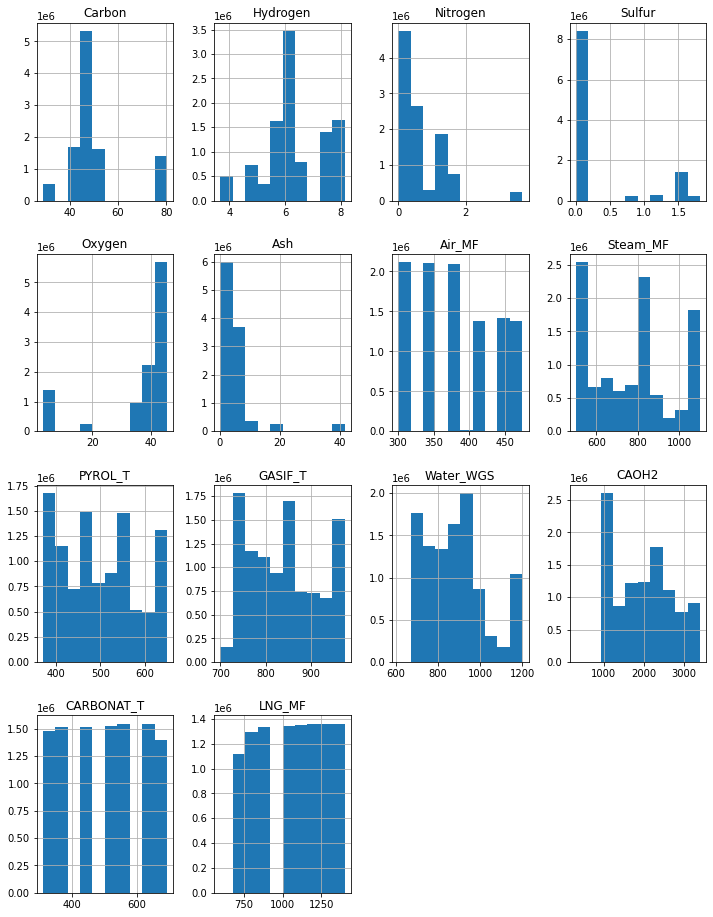

In [14]:
#feature_vars.hist(bins = 10 , figsize= (12,16)) ;
#plt.savefig("out.png")

In [15]:
#sns.set()
#sns.pairplot(train[["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T","LNG_MF"]], size = 3)
#plt.show();

In [16]:
#f, ax = plt.subplots(7,2,figsize=(12,8))
#vis1 = sns.distplot(feature_vars["Carbon"],bins=20, ax= ax[0][0])
#vis2 = sns.distplot(feature_vars["Hydrogen"],bins=20, ax=ax[0][1])
#vis3 = sns.distplot(feature_vars["Nitrogen"],bins=20, ax=ax[1][0])
#vis4 = sns.distplot(feature_vars["Sulfur"],bins=20, ax=ax[1][1])
#vis1 = sns.distplot(feature_vars["Oxygen"],bins=20, ax= ax[2][0])
#vis2 = sns.distplot(feature_vars["Ash"],bins=20, ax=ax[2][1])
#vis3 = sns.distplot(feature_vars["Air_MF"],bins=20, ax=ax[3][0])
#vis4 = sns.distplot(feature_vars["Steam_MF"],bins=20, ax=ax[3][1])
#vis4 = sns.distplot(feature_vars["PYROL_T"],bins=20, ax=ax[4][1])
#vis1 = sns.distplot(feature_vars["GASIF_T"],bins=20, ax= ax[4][0])
#vis2 = sns.distplot(feature_vars["Water_WGS"],bins=20, ax=ax[5][1])
#vis3 = sns.distplot(feature_vars["CAOH2"],bins=20, ax=ax[5][0])
#vis4 = sns.distplot(feature_vars["CARBONAT_T"],bins=20, ax=ax[6][0])
#vis4 = sns.distplot(feature_vars["LNG_MF"],bins=20, ax=ax[6][1])

In [17]:
#f = plt.figure(figsize=(12,5))
#plt.xlabel('kg/hr')
#plt.ylabel('Frequency')
#sns.distplot(target_vars.LNG , bins=30 ) ;

<AxesSubplot:>

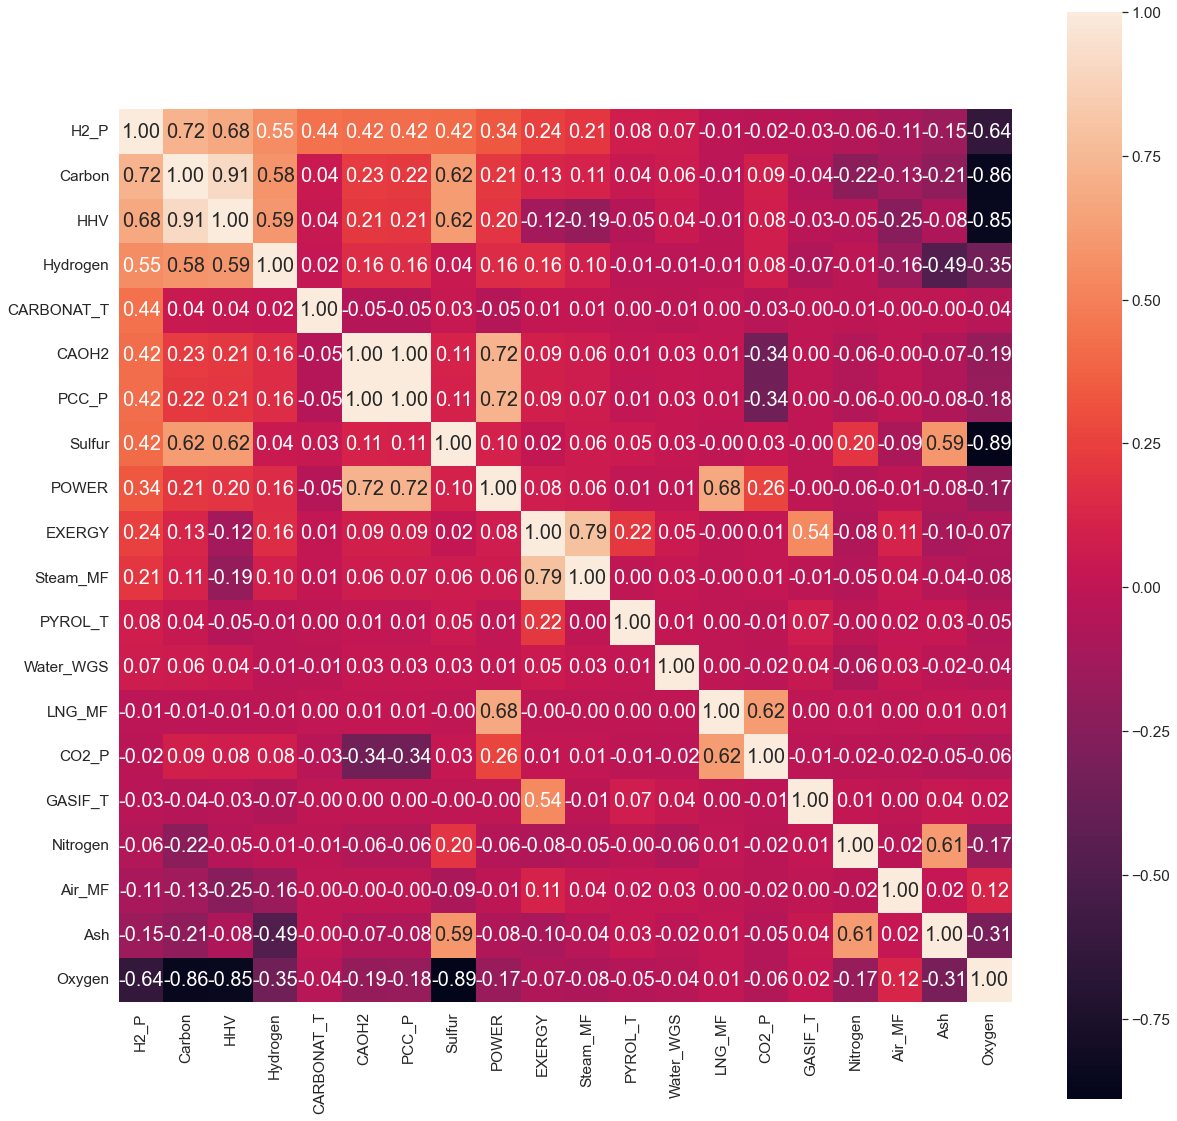

In [19]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'POWER')['POWER'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [20]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
#train_y1 = train[target_vars.P_H2.columns]
#train_y2 = train[target_vars.P_CO2.columns]
#train_y3 = train[target_vars.P_Power.columns]
#train_y4 = train[target_vars.P_PCC.columns]
train_X.shape
#train_y1.shape
#train_y2.shape
#train_y3.shape
#train_y4.shape

(10511796, 14)

In [21]:
#برای تست فعلا تارگت را اف میکنم
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]
#test_y1 = test[target_vars.P_H2.columns]
#test_y2 = test[target_vars.P_CO2.columns]
#test_y3 = test[target_vars.P_Power.columns]
#test_y4 = test[target_vars.P_PCC.columns]

test_X.shape

(3503933, 14)

In [22]:
train_X.columns


Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T',
       'LNG_MF'],
      dtype='object')

In [23]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T',
       'LNG_MF'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [25]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
5896939,-0.391860,-0.206340,-0.498478,-0.525318,0.622039,-0.385876,1.073096,-0.799418,-1.336362,-1.277271,-1.241948,-0.464329,1.017243,0.177669,-0.212271,0.372472,-0.173230,-0.461323,-1.341662,-0.353004
10059177,-0.556293,-1.304190,1.249026,-0.240991,-0.153152,0.323264,-1.306669,-0.970009,-0.039834,-0.562931,0.541864,-0.246527,1.017243,1.507106,0.189843,1.246499,0.912080,-0.243213,-1.209358,0.282293
8623147,-0.109518,1.345168,0.890563,-0.341342,-0.082153,0.020003,0.478154,-0.945639,-1.054508,-0.562931,-0.838066,-1.144962,0.511914,-0.265477,0.303879,0.081130,-1.046246,-1.142917,-1.000766,0.582544
13522491,2.369002,0.973169,-0.334183,2.117249,-2.394685,0.261999,-0.116787,0.175387,-1.392733,0.151408,-0.905380,0.352430,0.511914,0.620815,1.593774,0.663815,0.806802,0.348155,-0.049093,2.782651
10969127,-1.755448,-2.175212,-0.005592,1.431520,0.667681,2.224004,-0.711728,1.637595,-0.378059,-1.277271,0.440894,-1.281089,-0.498744,-1.594914,-1.646140,-0.792897,-2.062819,-1.279236,0.235326,-2.019422


In [26]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
3697787,-0.392103,-0.206387,-0.497881,-0.525691,0.622220,-0.385583,-1.307054,1.637633,0.017720,1.223702,-0.905147,-1.281281,1.523115,1.063406,-0.164295,1.099499,-0.259608,-1.279415,1.892733,-0.835564
9038484,0.254271,-0.227280,-0.482392,-0.525691,0.066156,-0.442159,-0.711804,-0.800023,-1.392366,-1.276439,0.440793,-1.281281,-0.498464,0.177385,-0.599976,0.428981,-0.860477,-1.279415,-1.441092,0.649834
7893345,-0.563702,-0.460516,-1.005243,-0.525691,0.648292,-0.018600,-0.711804,0.662571,0.638157,0.509376,0.440793,-1.281281,-0.498464,0.620395,-0.557214,0.764240,-0.560032,-1.279415,0.859751,-0.695641
3602138,-0.156580,1.609909,1.002118,-0.525691,0.167885,-0.335123,-0.711804,0.175040,0.976578,-0.190663,1.113763,1.303954,-0.498464,-1.594659,1.012074,-1.276557,-0.007607,1.309441,0.442328,0.074671
13718492,2.367914,0.973498,-0.333735,2.115437,-2.393359,0.261224,-1.307054,1.637633,-0.377104,0.866539,1.450248,0.766497,1.017720,-1.151648,3.609241,-0.576797,-0.066622,0.742456,1.741678,2.064310


In [27]:
train_X.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
5896939,45.85,6.13,0.35,0.00,44.80,2.87,440,600,375,750,700,1600,630,1100
10059177,43.80,4.92,1.52,0.17,34.10,7.50,300,565,490,800,965,1760,630,1400
8623147,49.37,7.84,1.28,0.11,35.08,5.52,405,570,400,800,760,1100,566,1000
13522491,80.27,7.43,0.46,1.58,3.16,7.10,370,800,370,850,750,2200,566,1200
10969127,28.85,3.96,0.68,1.17,45.43,19.91,335,1100,460,750,950,1000,438,700


In [28]:
train_y.head()

,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
5896939,121.720684,601.761446,363.475220,2161.34063,335.136485,8116.07471
10059177,138.348260,766.358311,440.310437,2377.47470,346.592276,9411.28963
8623147,143.063714,546.895824,301.669486,1485.92169,364.653590,10023.42840
13522491,196.401431,656.627070,432.857193,2963.48465,447.056106,14508.90660
10969127,62.429599,382.298959,229.700598,1350.83790,471.683061,4718.65664


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [ ]:
#model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.09196996688842773,
  'Train_R2_Score': 0.8106116853222702,
  'Test_R2_Score': 0.8010762122634891,
  'Test_RMSE_Score': 21.809096936054562},
 {'Name': 'Ridge: ',
  'Train_Time': 0.012181520462036133,
  'Train_R2_Score': 0.812875245111774,
  'Test_R2_Score': 0.8017287764883965,
  'Test_RMSE_Score': 21.77329546762616},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.0661008358001709,
  'Train_R2_Score': 0.9935636869181376,
  'Test_R2_Score': 0.9878844739306343,
  'Test_RMSE_Score': 5.382269761528466},
 {'Name': 'SVR:',
  'Train_Time': 19.37708330154419,
  'Train_R2_Score': 0.8016437422536002,
  'Test_R2_Score': 0.7973042778824833,
  'Test_RMSE_Score': 22.01489478993537},
 {'Name': 'RandomForest ',
  'Train_Time': 3.246819019317627,
  'Train_R2_Score': 0.9999978064253472,
  'Test_R2_Score': 0.9999816264459183,
  'Test_RMSE_Score': 0.20959982166045912},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 2.43464732170105,
  'Train_R2_Score': 1.0,
  

In [ ]:
#df1 = pd.DataFrame(model_data)
#df1

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.091970,0.810612,0.801076,21.809097
1,Ridge:,0.012182,0.812875,0.801729,21.773295
2,KNeighborsRegressor:,0.066101,0.993564,0.987884,5.382270
3,SVR:,19.377083,0.801644,0.797304,22.014895
4,RandomForest,3.246819,0.999998,0.999982,0.209600
5,ExtraTreeRegressor :,2.434647,1.000000,0.999997,0.080717
6,GradientBoostingClassifier:,1.281336,0.977745,0.976938,7.425733
7,XGBRegressor:,0.565279,0.999770,0.999691,0.858888
8,MLPRegressor:,4.076261,0.706725,0.703804,26.612405


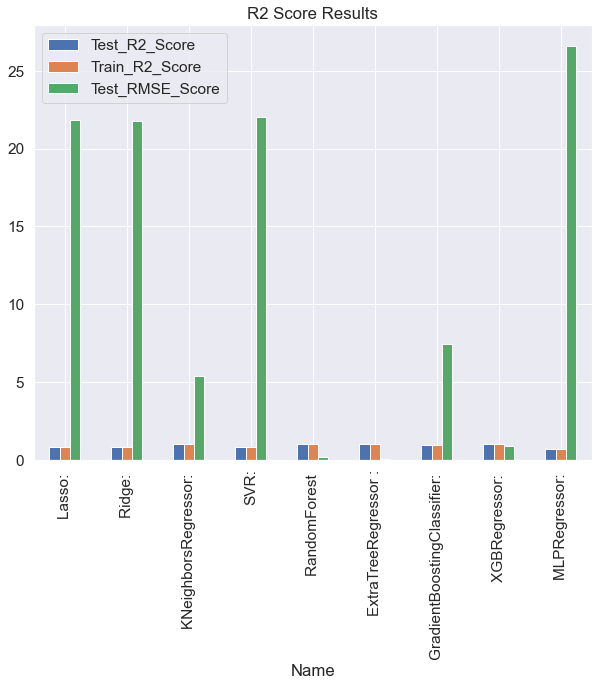

In [ ]:
#df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [ ]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200],
              'n_estimators' : [100,150,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, n_estimators=200, random_state=40)

In [ ]:
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [ ]:
grid_search.best_estimator_.score(test_X,test_y)

0.9481632485181273

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

179.73038954607972

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

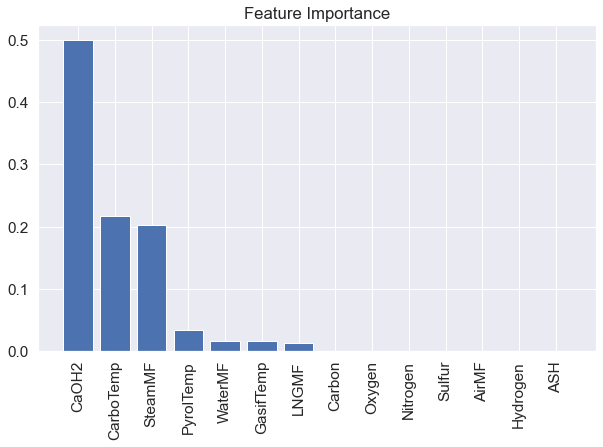

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
names[0:5]

['CaOH2', 'CarboTemp', 'SteamMF', 'PyrolTemp', 'WaterMF']

In [ ]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [ ]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, n_estimators=200, random_state=40)

In [ ]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.8496874927358102
Testing set R2 Score -  0.8277757332824176
Testing set RMSE Score -  188.16580024367354
